The V3000 mol file format allows a number of interesting and useful advanced query features. Here I'll look at two of them: position variation bonds (a.k.a. variable attachment points) and link nodes.

This blog post uses features from the 2021.03.1 RDKit release; some of this will not work with older releases.

In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolEnumerator
import rdkit
print(rdkit.__version__)

2021.03.1


# Position variation bonds

Here's a molecule with a position variation bond:

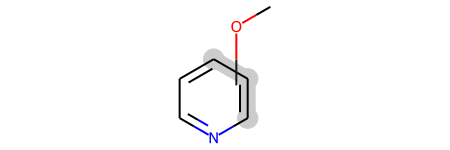

In [7]:
pv1 = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
pv1

The query is describing a molecule consisting of a pyriding ring with an methoxy substituted either ortho, meta, or para to the N atom.

The RDKit includes functionality in the `rdkit.Chem.rdMolEnumerator` module which allows you enumerate all of the molecules which are described by this query.

The function `rdMolEnumerator.Enumerate()` is straightforward to use: given a molecule with supported query features it returns a `MolBundle` object which includes each possible expansion of the query:

In [92]:
pv1_bundle = rdMolEnumerator.Enumerate(pv1)
pv1_bundle

We can render the molecules in the bundle using `Draw.MolsToGridImage()`:

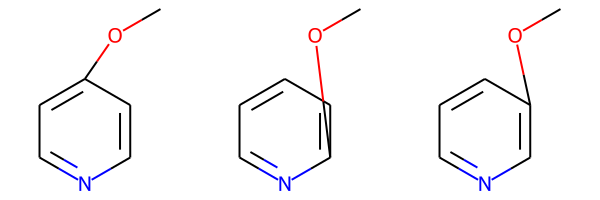

In [94]:
Draw.MolsToGridImage(pv1_bundle)

These are pretty ugly since the enumeration hasn't generated new coordinates for the atom which correspond to the new connectivity.

I'll use this convenience function to find the common core shared by the molecules in a bundle and generate 2D coordinates for all the molecules with the core oriented consistently:

In [53]:
from rdkit.Chem import rdFMCS
def align_bundle_coords(bndl):
    ps = rdFMCS.MCSParameters()
    for m in bndl:
        Chem.SanitizeMol(m)
    mcs = rdFMCS.FindMCS(bndl,completeRingsOnly=True)
    q = Chem.MolFromSmarts(mcs.smartsString)
    rdDepictor.Compute2DCoords(q)
    for m in bndl:
        rdDepictor.GenerateDepictionMatching2DStructure(m,q)


Now let's apply that to our bundle:

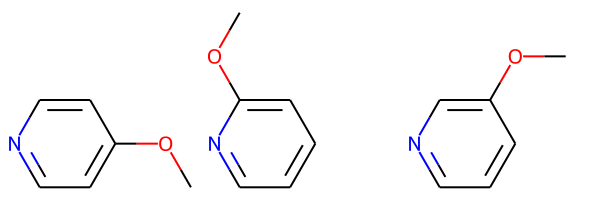

In [54]:
pv1_bundle = rdMolEnumerator.Enumerate(pv1)
align_bundle_coords(pv1_bundle)
Draw.MolsToGridImage(pv1_bundle)

Of course a molecule can have more than one position variation bond:

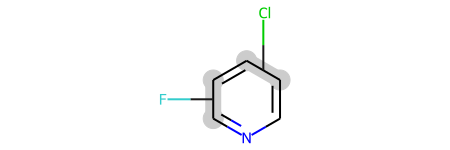

In [8]:
pv2 = Chem.MolFromMolBlock('''
  Mrv2007 06242006032D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 10 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -3.042 0.875 0 0
M  V30 8 F -5.0434 0.875 0 0
M  V30 9 * -1.0415 2.03 0 0
M  V30 10 Cl -1.0415 4.34 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(2 2 3) ATTACH=ANY
M  V30 8 1 9 10 ENDPTS=(2 1 6) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END
''')
pv2

This is also supported by the enumerator:

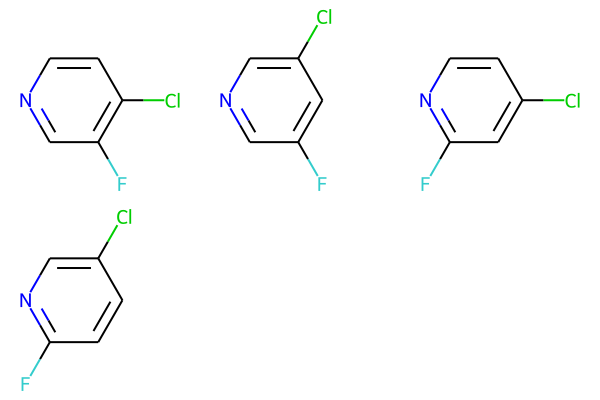

In [55]:
pv2_bundle = rdMolEnumerator.Enumerate(pv2)
align_bundle_coords(pv2_bundle)
Draw.MolsToGridImage(pv2_bundle)

# Link nodes

Another useful query feature, link nodes, allow you to describe rings of various sizes or chains with different lengths:

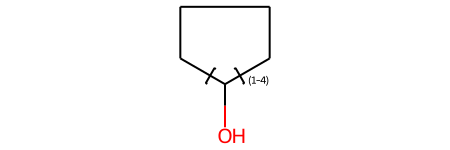

In [6]:
link1 = Chem.MolFromMolBlock('''one linknode
  Mrv2007 06222005102D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 6 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 8.25 12.1847 0 0
M  V30 2 C 6.9164 12.9547 0 0
M  V30 3 C 6.9164 14.4947 0 0
M  V30 4 C 9.5836 14.4947 0 0
M  V30 5 C 9.5836 12.9547 0 0
M  V30 6 O 8.25 10.6447 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 4 5
M  V30 4 1 1 5
M  V30 5 1 3 4
M  V30 6 1 1 6
M  V30 END BOND
M  V30 LINKNODE 1 4 2 1 2 1 5
M  V30 END CTAB
M  END''')
link1

And we can enumerate and display these in the same way. Here there's not much sense in doing the MCS analysis to get the shared coordinates, so I just generate coordinates for the molecules directly:

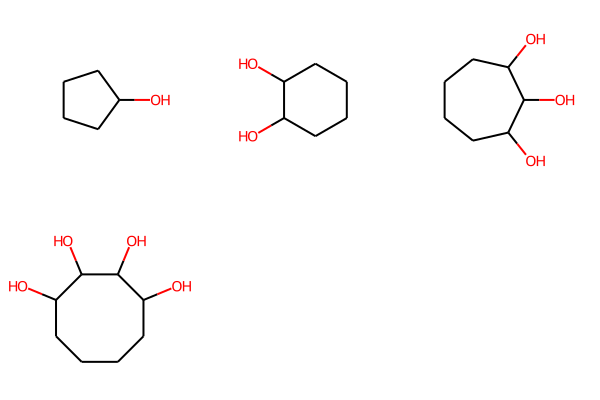

In [57]:
link1_bundle = rdMolEnumerator.Enumerate(link1)
for m in link1_bundle:
     Chem.SanitizeMol(m)
     rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(link1_bundle)

# Combining them

We can also combine link nodes and position variation bonds in the same molecule:

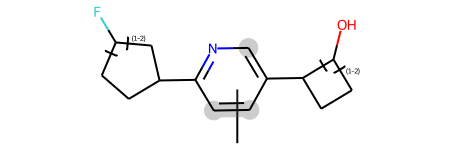

In [62]:
combined = Chem.MolFromMolBlock('''
  Mrv2108 05132110052D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 19 20 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -2.2078 4.3165 0 0
M  V30 2 C -2.9544 2.9695 0 0
M  V30 3 C -2.1612 1.6495 0 0
M  V30 4 C -0.6214 1.6763 0 0
M  V30 5 C 0.1252 3.0233 0 0
M  V30 6 C -0.668 4.3433 0 0
M  V30 7 C 1.6649 3.0501 0 0
M  V30 8 C -4.4941 2.9427 0 0
M  V30 9 C 2.4581 1.7301 0 0
M  V30 10 C 2.985 3.8433 0 0
M  V30 11 C 3.7781 2.5233 0 0
M  V30 12 C -6.3747 4.5774 0 0
M  V30 13 C -6.9764 3.1598 0 0
M  V30 14 C -5.8142 2.1495 0 0
M  V30 15 C -4.8405 4.4431 0 0
M  V30 16 F -7.1678 5.8974 0 0
M  V30 17 O 3.3575 5.3376 0 0
M  V30 18 * -1.1502 2.5564 0 0
M  V30 19 C -1.1502 0.2464 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 5 7
M  V30 8 1 2 8
M  V30 9 1 9 11
M  V30 10 1 10 11
M  V30 11 1 7 9
M  V30 12 1 7 10
M  V30 13 1 12 13
M  V30 14 1 13 14
M  V30 15 1 12 15
M  V30 16 1 14 8
M  V30 17 1 8 15
M  V30 18 1 12 16
M  V30 19 1 10 17
M  V30 20 1 18 19 ENDPTS=(3 6 3 4) ATTACH=ANY
M  V30 END BOND
M  V30 LINKNODE 1 2 2 10 7 10 11
M  V30 LINKNODE 1 2 2 12 13 12 15
M  V30 END CTAB
M  END
''')
combined

Enumerating that produces 12 molecules:

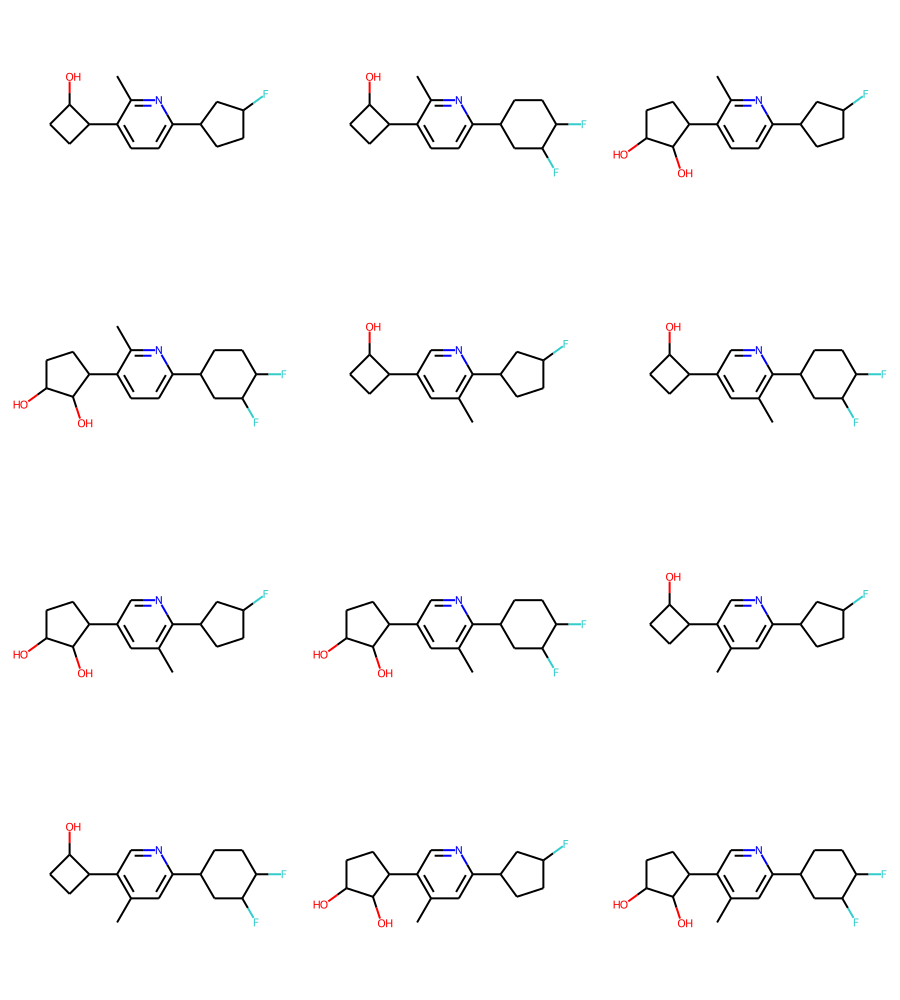

In [95]:
combined_bundle = rdMolEnumerator.Enumerate(combined)
align_bundle_coords(combined_bundle)
Draw.MolsToGridImage(combined_bundle,subImgSize=(300,250))

# Using MolBundles for substructure search

`MolBundle`s can also be used as substructure search queries.

Here's another query molecule:

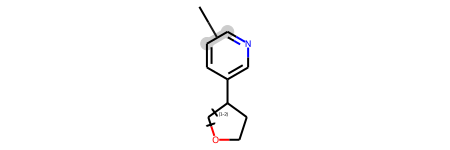

In [83]:
qry= Chem.MolFromMolBlock('''
  Mrv2108 05132113572D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 13 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 1.2124 -2.4845 0 0
M  V30 2 N 2.5461 -3.2545 0 0
M  V30 3 C 2.5461 -4.7945 0 0
M  V30 4 C 1.2124 -5.5645 0 0
M  V30 5 C 1.2124 -7.1045 0 0
M  V30 6 C -0.0335 -8.0097 0 0
M  V30 7 O 0.4424 -9.4744 0 0
M  V30 8 C 1.9824 -9.4744 0 0
M  V30 9 C 2.4583 -8.0097 0 0
M  V30 10 C -0.1212 -4.7945 0 0
M  V30 11 C -0.1212 -3.2545 0 0
M  V30 12 * 0.5456 -2.8695 0 0
M  V30 13 C -0.6094 -0.869 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 2 1 2
M  V30 2 1 2 3
M  V30 3 2 3 4
M  V30 4 1 4 5
M  V30 5 1 6 7
M  V30 6 1 7 8
M  V30 7 1 8 9
M  V30 8 1 5 9
M  V30 9 1 4 10
M  V30 10 2 10 11
M  V30 11 1 1 11
M  V30 12 1 12 13 ENDPTS=(2 11 1) ATTACH=ANY
M  V30 13 1 5 6
M  V30 END BOND
M  V30 LINKNODE 1 2 2 6 5 6 7
M  V30 END CTAB
M  END
''')
qry

And a set of molecules to search through which I pulled from ChEMBL

In [96]:
smis = '''Cc1nc(C(C)(C)NC(=O)c2ccc(C3CCOCC3)c(OCC3CC3)n2)no1
 CC(C)(CO)NC(=O)c1ccc(C2CCOC2)c(OCC2CC2)n1
 CC(C)(NC(=O)c1ccc(C2CCOCC2)c(OCC2CC2)n1)c1nccs1
 Cc1c(-c2cncc(C3(O)CCOCC3)c2)cnc2c1CCCN2C(N)=O
 CC(C)Oc1cc(NC(=O)N2CCCc3cc(C4CCOC4)c(C=O)nc32)ncc1C#N
 NC(=O)N1CCCc2cc(-c3cncc(C4(O)CCOC4)c3)cnc21
 CCC(CC)(NC(=O)c1ccc(C2CCOCC2)c(OCC2CC2)n1)C(=O)NC
 CC(C)(NC(=O)c1ccc(C2CCOCC2)c(OCC2CC2)n1)c1ncco1
 N#Cc1cc(-c2ccoc2)c2ccc(OCc3cncc(C4(O)CCOCC4)c3)cc2c1
 Nc1cc(-c2cc(C3CCOCC3)cnc2N)ccc1C(=O)N[C@H](CO)c1ccccc1
 Nc1ncc(C2CCOCC2)cc1-c1ccc(C(=O)NCc2cccnc2)cc1
 Cc1nc(C(C)(C)NC(=O)c2ccc(C3CCOC3)c(OCC3CC3)n2)no1
 CC(C)C[C@H](NC(=O)c1ccc(C2CCOC2)c(OCC2CC2)n1)C(N)=O
 Nc1ncc(C2CCOCC2)cc1-c1ccc(C(=O)N[C@H](CO)c2ccccc2)cc1Cl
 NC(=O)[C@H](CC1CC1)NC(=O)c1ccc(C2CCOC2)c(OCC2CC2)n1
'''
mols = [Chem.MolFromSmiles(x.strip()) for x in smis.split('\n') if x.strip()]

The query itself doesn't match most of these molecules:

In [87]:
matches = [x for x in mols if x.HasSubstructMatch(qry)]
len(mols),len(matches)

(15, 6)

But if we enumerate it into a MolBundle and use that as the substructure query then all the molecules match:

In [88]:
qry_bundle = rdMolEnumerator.Enumerate(qry)
matches = [x for x in mols if x.HasSubstructMatch(qry_bundle)]
len(mols),len(matches)

(15, 15)

Let's look at a few of those matches

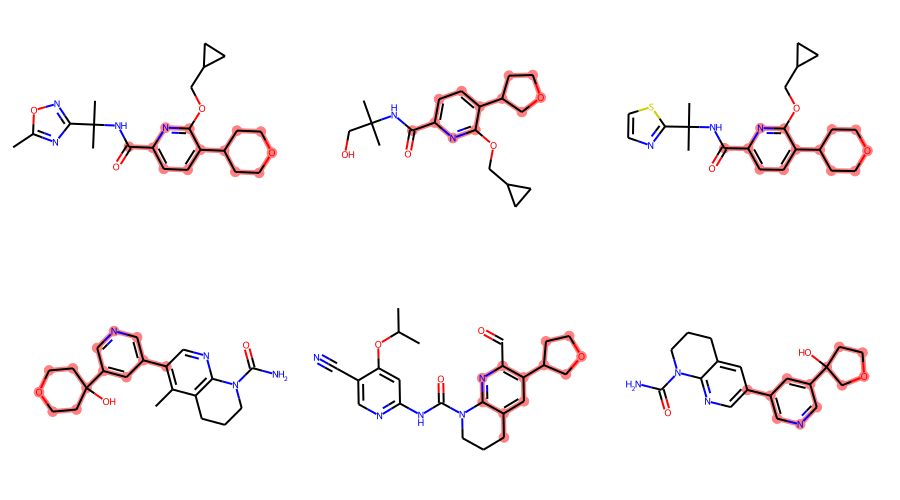

In [91]:
matches = []
matched_ats = []
for x in mols:
    match = x.GetSubstructMatch(qry_bundle)
    if match:
        matches.append(x)
        matched_ats.append(match)
Draw.MolsToGridImage(matches[:6],highlightAtomLists=matched_ats,subImgSize=(300,250))

We're working on expanding support for the MolBundle in other RDKit code. For example, it would be really nice to be able to use them directly as queries for the [SubstructLibrary](http://rdkit.blogspot.com/2018/02/introducing-substructlibrary.html)

# Final bit: input from CXSMILES

It's also possible to read both variable attachment points and link nodes from CXSMILES:

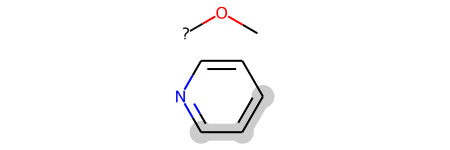

In [67]:
m = Chem.MolFromSmiles('CO*.C1=CC=NC=C1 |c:2,4,6,m:2:3.5.4|')
m

As that example shows, the coordinate generation code is currently not great at setting the atom positions for these. That's a ToDo for a future release.

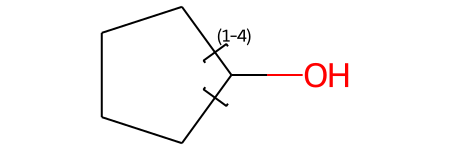

In [68]:
m = Chem.MolFromSmiles('OC1CCCC1 |LN:1:1.4.2.5|')
m

The RDKit currently does not write either link nodes or variable attachment points to CXSMILES, that's another ToDo for a future release.